In [1]:
# project: p2
# submitter: htan47
# partner: none
# hours: 15

In [2]:
# autoreolad from load.py
%load_ext autoreload
%autoreload 2

In [3]:
# import statements
import loans
import search
import pandas as pd
import time

In [4]:
fhb = loans.Bank("First Home Bank")

In [5]:
#Q1
total = 0
total_rate = 0.0
for loan in fhb.loans:
    if loan.interest_rate != -1:
        total += 1
        total_rate += loan.interest_rate
total_rate / total

2.8333333333333335

In [6]:
#Q2
total_app = 0
for loan in fhb.loans:
    total_app += len(loan.applicants)
total_app / len(fhb.loans)

1.3043478260869565

In [7]:
#Q3
age_dicts = {}
for loan in fhb.loans:
    for app in loan.applicants:
        if app.age in age_dicts:
            age_dicts[app.age] += 1
        else:
            age_dicts[app.age] = 1
age_dicts

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '35-44': 1, '>74': 3}

In [8]:
fhb_loan_tree = search.BST()
for loan in fhb.loans:
    fhb_loan_tree.add(loan.interest_rate, loan)

In [9]:
#Q4
len(fhb_loan_tree[-1])

11

In [10]:
#Q5
def height(node):
    if node == None: 
        return -1 
    left_height = height(node.left)
    right_height = height(node.right)
    return max(left_height, right_height) + 1

height(fhb_loan_tree.root)

5

In [11]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu_loan_tree = search.BST()

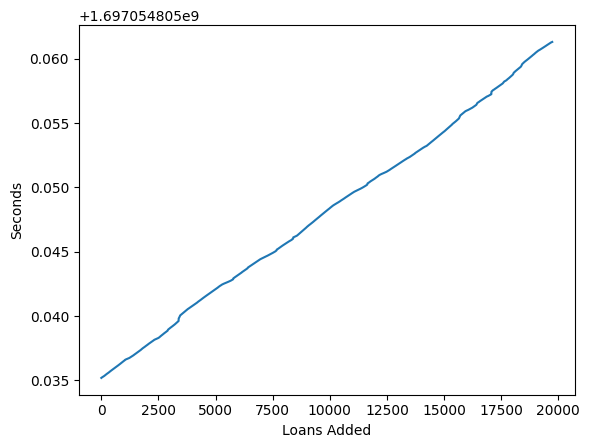

In [12]:
#Q6
time_taken = []
t0 = time.time()
for loan in uwcu.loans:
    uwcu_loan_tree.add(loan.interest_rate, loan)
    t1 = time.time()
    time_taken.append(t1)
    
time_df = pd.DataFrame(data=time_taken)

ax = time_df.plot.line(legend=None, ylabel="Seconds", xlabel="Loans Added")

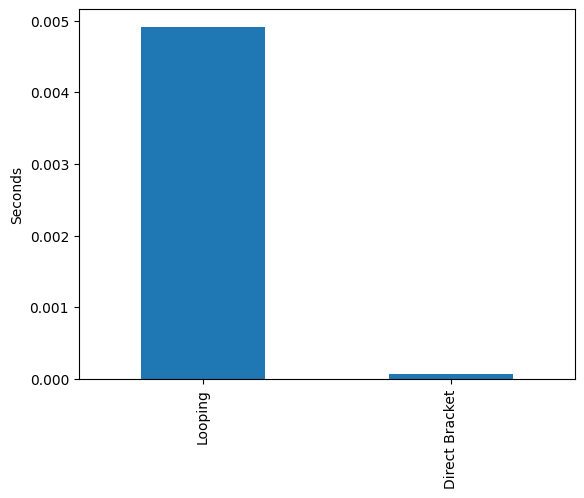

In [13]:
#Q7
t0 = time.time()
count = 0
for loan in uwcu.loans:
    if loan.interest_rate == -1:
        count += 1
t1 = time.time()

t2 = time.time()
count = len(uwcu_loan_tree[-1])
t3 = time.time()

time_dict = {}
time_dict["Looping"] = t1 - t0
time_dict["Direct Bracket"] = t3 -t2

time_df = pd.Series(data=time_dict)
ax = time_df.plot.bar(ylabel="Seconds")

Text(0, 0.5, 'Number of Applicants')

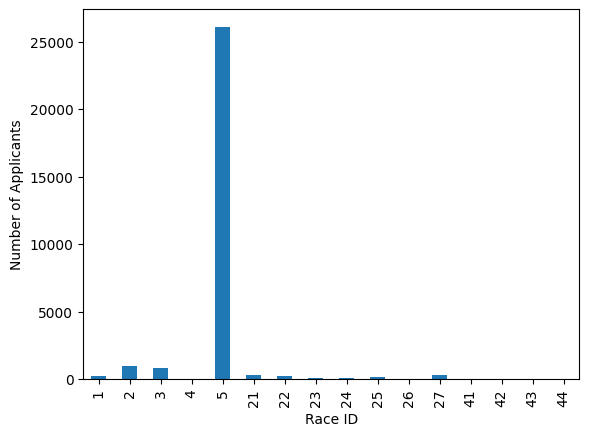

In [14]:
#Q8
race_dict = {}
for loan in uwcu.loans:
    for app in loan.applicants:
        for race in app.race:
            if race in race_dict:
                race_dict[race] += 1
            else:
                race_dict[race] = 1
                
race_num_dict = {}
for race in loans.race_lookup:
    if loans.race_lookup[race] not in race_dict:
        race_num_dict[race] = 0
    for race_app in race_dict:
        if loans.race_lookup[race] == race_app:
            race_num_dict[race] = race_dict[race_app]
            break
            
race_df = pd.Series(data=race_num_dict)
ax = race_df.plot.bar()
ax.set_xlabel("Race ID")
ax.set_ylabel("Number of Applicants")

In [15]:
#Q9
def leaf_count(node):
    if node == None:
        return 0
    if node.left == None and node.right == None:
        return 1
    else:
        return leaf_count(node.left) +leaf_count(node.right)

leaf_count(uwcu_loan_tree.root)

13

In [16]:
#Q10
def interest_rate(node, top_n):
    result = []
    if node.left != None:
        result += interest_rate(node.left, top_n)
        if len(result) > top_n:
            while len(result) > top_n:
                result.pop(0)
    if len(result) == top_n:
        result[top_n-1] = node.key
    else:
        result.append(node.key)
    if node.right != None:
        result += interest_rate(node.right, top_n)
        if len(result) > top_n:
            while len(result) > top_n:
                result.pop(0)
    
    return result

interest_rate(uwcu_loan_tree.root, 5)[0]

6.49